In [101]:
import pandas as pd

In [102]:
url = 'https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/babynames/yob1880.txt'
df=pd.read_csv(url, sep=',')
df.columns = ['name','sex', 'quantity']
df['year'] = 1880;
df['cumsum'] = df['quantity'].cumsum()
df.to_csv('1.csv')

In [103]:
i = 1881
years = [1880]
while i <= 1900:
    url = 'https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/babynames/yob'+ str(i) +'.txt'
    df=pd.read_csv(url, sep=',')
    df.columns = ['name','sex', 'quantity']
    df['year'] = i;
    df['cumsum'] = df['quantity'].cumsum()
    with open('1.csv','r') as infile:
        df.to_csv('1.csv',mode='a',header=False)
    years.append(i)
    i += 1



In [104]:
df_all = pd.read_csv('1.csv', sep=',')
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55978 entries, 0 to 55977
Data columns (total 6 columns):
Unnamed: 0    55978 non-null int64
name          55978 non-null object
sex           55978 non-null object
quantity      55978 non-null int64
year          55978 non-null int64
cumsum        55978 non-null int64
dtypes: int64(4), object(2)
memory usage: 2.6+ MB


Сгруппируйте данные по полу и году и визуализируйте общую динамику рождаемости обоих полов


In [5]:
df_all.groupby(['year', 'sex'])['quantity'].sum()

year  sex
1880  F       83928
      M      110493
1881  F       85036
      M      100748
1882  F       99702
      M      113687
1883  F      104310
      M      104632
1884  F      119804
      M      114445
1885  F      123928
      M      107802
1886  F      134647
      M      110785
1887  F      136095
      M      101412
1888  F      166877
      M      120857
1889  F      166720
      M      110590
1890  F      178299
      M      111026
1891  F      173782
      M      101198
1892  F      199176
      M      122038
1893  F      200124
      M      112319
1894  F      209772
      M      115775
1895  F      220186
      M      117398
1896  F      224113
      M      119575
1897  F      220787
      M      112760
1898  F      244365
      M      122703
1899  F      219850
      M      106218
1900  F      283163
      M      150554
Name: quantity, dtype: int64

In [29]:
M = df_all[df_all.sex == 'M'].groupby(['year', 'sex']).agg({'quantity':sum})/10000
F = df_all[df_all.sex == 'F'].groupby(['year', 'sex']).agg({'quantity':sum})/10000
data = np.column_stack((M, F))

MF = pd.merge(M, F, on='year')

MF

,quantity_x,quantity_y
year,,
1880,11.0493,8.3928
1881,10.0748,8.5036
1882,11.3687,9.9702
1883,10.4632,10.4310
1884,11.4445,11.9804
1885,10.7802,12.3928
1886,11.0785,13.4647
1887,10.1412,13.6095
1888,12.0857,16.6877


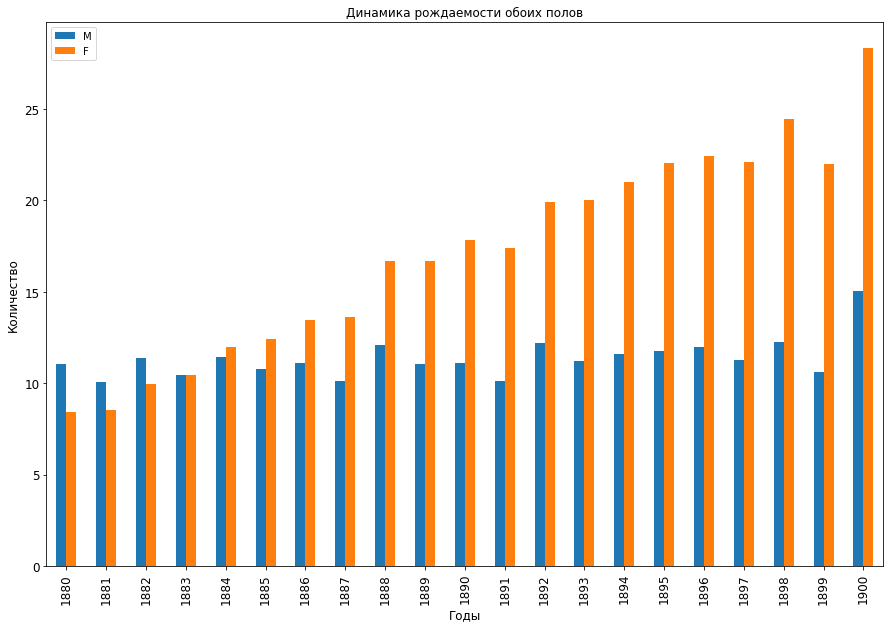

In [128]:

ax = MF[['quantity_x', 'quantity_y']].plot(kind='bar', title ="Динамика рождаемости обоих полов", figsize=(15, 10), legend=True, fontsize=12)

ax.set_xlabel("Годы", fontsize=12)
ax.set_ylabel("Количество", fontsize=12)
ax.set_xticklabels(years)
ax.legend(['M', 'F'])
plt.show()




In [10]:
df_all['quantity'].sum()
df_all.groupby(['name'])['quantity'].sum()


name
Aaron        1844
Ab             21
Abb            16
Abbie        2189
Abbott         11
Abby          128
Abe          1003
Abel          240
Abelina         5
Abie           10
Abigail       275
Abner         492
Abraham      1725
Abram         427
Abron           5
Ace            99
Acey            5
Achsa          12
Achsah         12
Acie           55
Acy            17
Ad              5
Ada         19974
Adabelle        5
Adah          798
Adalene         5
Adalia          5
Adaline       406
Adam         1994
Adams           7
            ...  
Zeola           9
Zepha          12
Zera           54
Zeta           72
Zetta         340
Zettie        205
Zilda          11
Zilla          70
Zillah        101
Zillie          7
Zilpah          9
Zilpha        162
Zilphia        11
Zimmie          5
Zina           96
Zita          179
Zoa           148
Zoe           630
Zola          628
Zollie         92
Zona          485
Zonie          16
Zora         1145
Zorah           5
Zudie

Найдите самые популярные имена за всю историю

In [7]:
df_all.groupby(['name']).agg({'quantity':sum}).sort_values(['quantity'],ascending=False).head(5)


,quantity
name,
John,181469
William,166489
James,112617
Anna,99919
George,97128


Разбейте весь временной промежуток в данных на 10 частей и для каждой найдите самое популярное имя каждого пола. Для каждого найденного имени визуализируйте его динамику за все время


In [11]:
 import numpy as np

In [12]:
min_ = df_all['year'].min()
step = (df_all['year'].max() - min_ )/10
df_all['year'].astype(int)
df_all.insert(len(df_all.columns), 'period', np.ceil((df_all.year - min_)/step))


In [13]:
df_all.groupby(['period','name', 'sex']).agg({'quantity':sum})



quantity
period name     sex          
0.0    Aaron    M         102
       Ab       M           5
       Abbie    F          71
       Abbott   M           5
       Abby     F           6
       Abe      M          50
       Abel     M           9
       Abigail  F          12
       Abner    M          27
       Abraham  M          81
       Abram    M          21
       Ada      F         652
       Adah     F          24
       Adaline  F          23
       Adam     M         104
       Adda     F          14
       Addie    F         274
                M           8
       Addison  M          19
       Adela    F           9
       Adelaide F          65
       Adelbert M          28
       Adele    F          41
       Adelia   F          18
       Adeline  F          54
       Adella   F          26
       Adelle   F           5
       Aden     M           7
       Adina    F           5
       Adline   F           8
...                       ...
10.0   Zena     F          31
       Zenas    M           7
       Zenia    F           7
       Zenna    F           6
       Zeno     M           5
       Zenobia  F          22
       Zeola    F           9
       Zera     F          14
       Zeta     F          19
       Zetta    F          32
       Zettie   F          35
       Zilda    F           6
       Zilla    F           5
       Zillah   F           6
       Zillie   F           7
       Zilpha   F          24
       Zimmie   F           5
       Zina     F          16
       Zita     F          32
       Zoa      F           6
       Zoe      F          53
       Zola     F          97
       Zollie   F          10
                M          15
       Zona     F          75
       Zonie    F           5
       Zora     F         155
       Zula     F         131
       Zuma     F           5
       Zylpha   F           6

[34044 rows x 1 columns]

In [14]:
df_goup = df_all.groupby(['period', 'sex']).agg({'quantity':max})
df_goup

quantity
period sex          
0.0    F        2604
       M        9655
1.0    F        3143
       M        9557
2.0    F        3860
       M        9387
3.0    F        4283
       M        9026
4.0    F        4982
       M        9248
5.0    F        5233
       M        8548
6.0    F        5542
       M        9039
7.0    F        5695
       M        8238
8.0    F        5949
       M        8321
9.0    F        5773
       M        8160
10.0   F        6343
       M        9834

In [15]:
df_polular = df_all.loc[df_all['quantity'].isin(df_goup.quantity)]
df_polular

,Unnamed: 0,name,sex,quantity,year,period
0,0,Anna,F,2604,1880,0.0
941,941,John,M,9655,1880,0.0
3933,0,Anna,F,3143,1882,1.0
4960,1027,John,M,9557,1882,1.0
8142,0,Anna,F,3860,1884,2.0
9313,1171,John,M,9387,1884,2.0
12731,0,Anna,F,4283,1886,3.0
14012,1281,John,M,9026,1886,3.0
17494,0,Anna,F,4982,1888,4.0
18967,1473,John,M,9248,1888,4.0


In [77]:
df_ = df_all.loc[df_all['name'].isin(['Anna'])]
Anna = df_.groupby(['name', 'period']).agg({'quantity':sum})/1000
df_ = df_all.loc[df_all['name'].isin(['John'])]
John = df_.groupby(['name', 'period']).agg({'quantity':sum})/1000
df_ = df_all.loc[df_all['name'].isin(['Edna'])]
Edna = df_.groupby(['name', 'period']).agg({'quantity':sum})/1000
df_ = df_all.loc[df_all['name'].isin(['Helen'])]
Helen = df_.groupby(['name', 'period']).agg({'quantity':sum})/1000



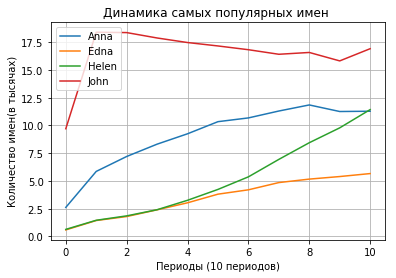

In [27]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = np.arange(0, 11, 1)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, Anna.quantity, label='Anna')
ax.plot(t, Edna.quantity, label='Edna')
ax.plot(t, Helen.quantity, label='Helen')
ax.plot(t, John.quantity, label='John')

ax.set(xlabel='Периоды (10 периодов)', ylabel='Количество имен(в тысячах)',
       title='Динамика самых популярных имен ')
ax.grid()
plt.legend()
fig.savefig("test.png")
plt.show()


Выберите 4 года из всего промежутка и отобразите для каждого года распределение по первой букве в имени, по последней букве в имени


In [129]:
df_sliced = df_all[df_all.year.isin(['1880', '1890', '1900', '1895'])]

df_1880 = df_all.loc[df_all['year'].isin(['1880'])]
df_1880 = df_1880.groupby([ df_all['name'].str.slice(0,1)]).agg({'quantity':sum})/1000

df_1890 = df_all.loc[df_all['year'].isin(['1890'])]
df_1890 = df_1890.groupby([ df_all['name'].str.slice(0,1)]).agg({'quantity':sum})/1000

df_1895 = df_all.loc[df_all['year'].isin(['1895'])]
df_1895 = df_1895.groupby([ df_all['name'].str.slice(0,1)]).agg({'quantity':sum})/1000

df_1900 = df_all.loc[df_all['year'].isin(['1900'])]
df_1900 = df_1900.groupby([ df_all['name'].str.slice(0,1)]).agg({'quantity':sum})/1000

data = pd.merge(df_1880,df_1890,  on='name')
data = pd.merge(data,df_1895,  on='name')
data = pd.merge(data,df_1900,  on='name')
data.columns = ['1880', '1890', '1895', '1900']


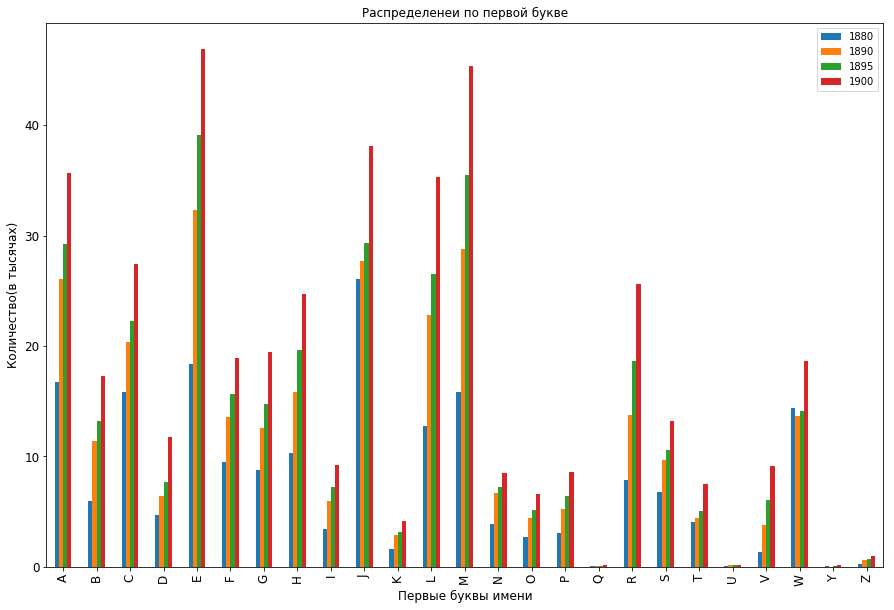

In [132]:

ax = data[['1880', '1890', '1895', '1900']].plot(kind='bar', title ="Распределенеи по первой букве", figsize=(15, 10), legend=True, fontsize=12)

ax.set_xlabel("Первые буквы имени", fontsize=12)
ax.set_ylabel("Количество(в тысячах)", fontsize=12)
ax.set_xticklabels(data.index.tolist(), rotation=90)
ax.legend(['1880', '1890', '1895', '1900'])
plt.show()






In [247]:
df_sliced = df_all[df_all.year.isin(['1880', '1890', '1900', '1895'])]
df_sliced.groupby(['year',df_all['name'].str.slice(-1)])['quantity'].count()


year  name
1880  a        450
      b          7
      c          7
      d         93
      e        490
      f          7
      g          9
      h         60
      i          7
      k         21
      l         98
      m         30
      n        223
      o         35
      p          4
      r         89
      s        125
      t         76
      u          5
      v          1
      w          7
      x          4
      y        147
      z          4
1890  a        688
      b          9
      c          9
      d        113
      e        721
      f          5
              ... 
1895  u          4
      v          1
      w          8
      x          6
      y        213
      z          6
1900  a        995
      b          7
      c          8
      d        139
      e       1023
      f          6
      g         15
      h         90
      i         11
      k         22
      l        183
      m         30
      n        343
      o         76
      p          7
 

In [246]:
df_all['name'].str.slice(-1).head(7)

0    a
1    a
2    h
3    e
4    t
5    a
6    e
Name: name, dtype: object

Для каждого года рассчитайте сколько имен покрывают 50% людей, визуализируйте (мы увидим разнообразие имен за каждый год)


In [105]:
df_half = df_all.groupby(['year']).agg({'quantity':sum})/2


In [117]:
tt = df_all.groupby(['year','name']).agg({'quantity':sum, 'cumsum' :sum }).sort_values(['year', 'quantity','cumsum'],ascending=[True,False, False])


In [124]:
data = pd.merge(tt, df_half, on='year')
data.columns = ['quantity', 'cumsum', 'total']
data = data[data['cumsum'] <= data['total']]
data = data.groupby(['year']).count()



pandas.core.frame.DataFrame

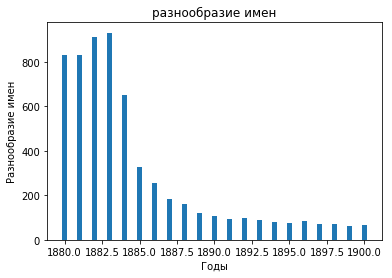

In [130]:
from matplotlib import pyplot as plt


plt.bar(data.index,data.quantity,width=.3)

plt.xlabel('Годы')
plt.ylabel('Разнообразие имен')
plt.title('разнообразие имен')
plt.show()

pandas.core.frame.DataFrame